In [38]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [39]:
topics =["abortion", "cloning", "death penalty", "gun control", "marijuana legalization", "minimum wage", "nuclear energy", "school uniforms"]
seeds = ["Seed1", "Seed2", "Seed3", "Seed4", "Seed5", "Seed6", "Seed7", "Seed8", "Seed9", "Seed10"]

In [40]:
def import_as_dataframe(seed, topic):
    input_file = f'/Users/myrthereuver/PycharmProjects/Claim_reproduction/acl2019-BERT-argument-classification-and-clustering-master/argument-classification/bert_output/bert_output/31May/ukp/{seed}/bert-base-topic-sentence/{topic}_test_topic/test_predictions.txt'
    df_current = pd.read_csv(input_file.format(seed, topic), delimiter = "\t", names=["True", "Pred", "Topic", "Claim"])
    return df_current

### Import data

In [49]:
seed_1_list = [import_as_dataframe('Seed1', t) for t in topics]
seed_2_list = [import_as_dataframe('Seed2', t) for t in topics]
seed_3_list = [import_as_dataframe('Seed3', t) for t in topics]
seed_4_list = [import_as_dataframe('Seed4', t) for t in topics]
seed_5_list = [import_as_dataframe('Seed5', t) for t in topics]
seed_6_list = [import_as_dataframe('Seed6', t) for t in topics]
seed_7_list = [import_as_dataframe('Seed7', t) for t in topics]
seed_8_list = [import_as_dataframe('Seed8', t) for t in topics]
seed_9_list = [import_as_dataframe('Seed9', t) for t in topics]
seed_10_list = [import_as_dataframe('Seed10', t) for t in topics]

In [50]:
df_all_seed1 = pd.concat(seed_1_list)
df_all_seed2 = pd.concat(seed_2_list)
df_all_seed3 = pd.concat(seed_3_list)
df_all_seed4 = pd.concat(seed_4_list)
df_all_seed5 = pd.concat(seed_5_list)
df_all_seed6 = pd.concat(seed_6_list)
df_all_seed7 = pd.concat(seed_7_list)
df_all_seed8 = pd.concat(seed_8_list)
df_all_seed9 = pd.concat(seed_9_list)
df_all_seed10 = pd.concat(seed_10_list)

df_all_list = [df_all_seed1, df_all_seed2, df_all_seed3, df_all_seed4, df_all_seed5, df_all_seed6, df_all_seed7, df_all_seed8, df_all_seed9, df_all_seed10]

### Add classes: TP, TN, FP, TP

In [88]:

def PosNegClass(df, label):
    column = f'class_{label}'
    df[column] = np.where(((df['Pred'] == label)&(df['True'] == label)), 'TP', '0')                        
    df[column] = np.where(((df['Pred'] == label)&(df['True'] != label)), 'FP', df[column] )         
    df[column] = np.where(((df['Pred'] != label)&(df['True'] != label)), 'TN', df[column] )      
    df[column] = np.where(((df['Pred'] != label)&(df['True'] == label)), 'FN', df[column] )  
    return df
    


#### No Argument

In [89]:
df_posNeg = PosNegClass(df_all_seed1, "NoArgument")
df_posNeg[:3]

,True,Pred,Topic,Claim,class_NoArgument,class_Argument_against,class_Argument_for
0,NoArgument,NoArgument,abortion,With that I would like to give everyone someth...,TP,TN,TN
1,NoArgument,NoArgument,abortion,"Do not judge , or you may be judged yourself .",TP,TN,TN
2,NoArgument,NoArgument,abortion,"Results have varied from poll to poll , countr...",TP,TN,TN


#### Argument against

In [55]:
df_posNeg = PosNegClass(df_all_seed1, "Argument_against")
df_posNeg[:3]

,True,Pred,Topic,Claim,class_NoArgument,class_Argument_against,class_Argument_for
0,NoArgument,NoArgument,abortion,With that I would like to give everyone someth...,TP,TN,TN
1,NoArgument,NoArgument,abortion,"Do not judge , or you may be judged yourself .",TP,TN,TN
2,NoArgument,NoArgument,abortion,"Results have varied from poll to poll , countr...",TP,TN,TN


#### Argument_for

In [56]:
df_posNeg = PosNegClass(df_all_seed1, "Argument_for")
df_posNeg[:3]

,True,Pred,Topic,Claim,class_NoArgument,class_Argument_against,class_Argument_for
0,NoArgument,NoArgument,abortion,With that I would like to give everyone someth...,TP,TN,TN
1,NoArgument,NoArgument,abortion,"Do not judge , or you may be judged yourself .",TP,TN,TN
2,NoArgument,NoArgument,abortion,"Results have varied from poll to poll , countr...",TP,TN,TN


### plotting the confusion class (TP, FN, FP, TN) count

df_posNeg['class_NoArgument'].value_counts()

#### No Argument

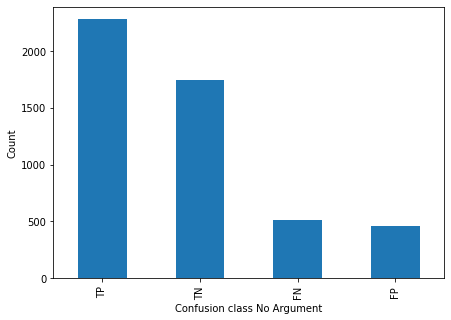

In [66]:
counts = df_posNeg['class_NoArgument'].value_counts()

# plot
counts.plot.bar(figsize=(7, 5))
plt.xlabel('Confusion class No Argument')
plt.ylabel('Count')
plt.show()

#### Argument For

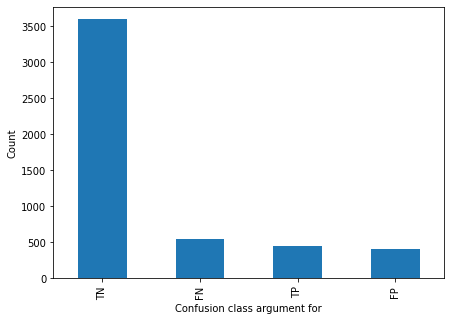

In [74]:
counts = df_posNeg['class_Argument_for'].value_counts()

# plot
counts.plot.bar(figsize=(7, 5))
plt.xlabel('Confusion class argument for')
plt.ylabel('Count')
plt.show()

#### Argument Against

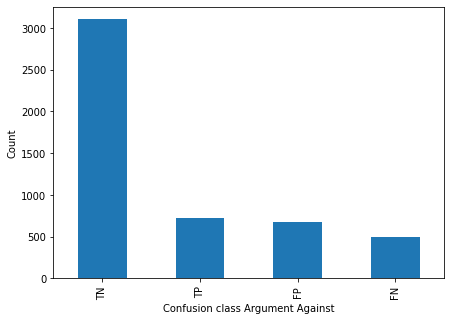

In [75]:
counts = df_posNeg['class_Argument_against'].value_counts()

# plot
counts.plot.bar(figsize=(7, 5))
plt.xlabel('Confusion class Argument Against')
plt.ylabel('Count')
plt.show()

### Plotting the confusion class (TP, FN, FP, TN) count per TOPIC

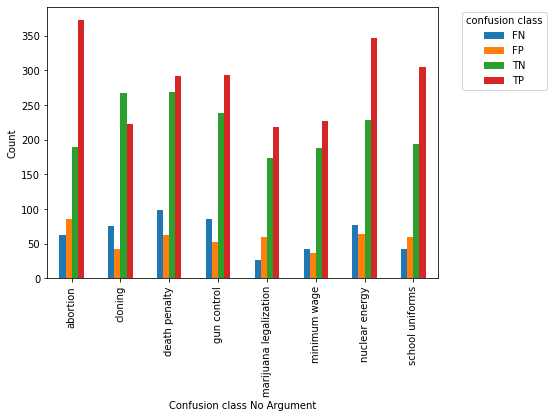

In [69]:
counts_topic = df_posNeg.groupby('Topic')['class_NoArgument'].value_counts().unstack()

# plot
counts_topic.plot.bar(figsize=(7, 5))
plt.legend(title='confusion class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Confusion class No Argument')
plt.ylabel('Count')
plt.show()

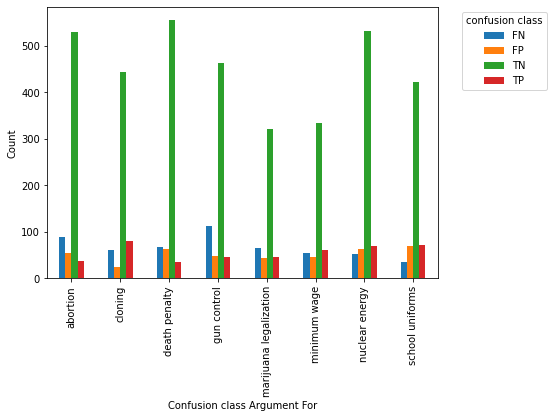

In [70]:
counts_topic = df_posNeg.groupby('Topic')['class_Argument_for'].value_counts().unstack()

# plot
counts_topic.plot.bar(figsize=(7, 5))
plt.legend(title='confusion class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Confusion class Argument For')
plt.ylabel('Count')
plt.show()

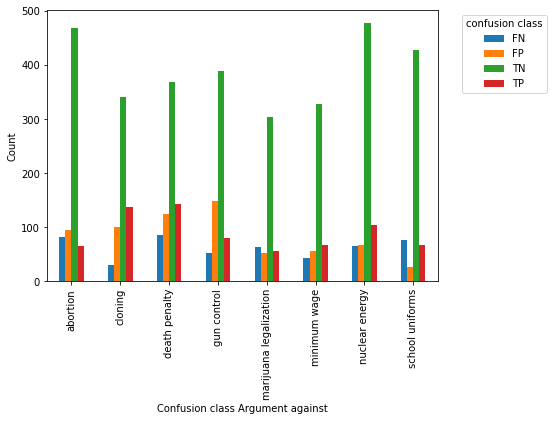

In [71]:
counts_topic = df_posNeg.groupby('Topic')['class_Argument_against'].value_counts().unstack()

# plot
counts_topic.plot.bar(figsize=(7, 5))
plt.legend(title='confusion class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Confusion class Argument against')
plt.ylabel('Count')
plt.show()

In [60]:
df_posNeg.groupby('Topic')['class_NoArgument'].value_counts()

Topic                   class_NoArgument
abortion                TP                  373
                        TN                  190
                        FP                   85
                        FN                   63
cloning                 TN                  267
                        TP                  223
                        FN                   76
                        FP                   43
death penalty           TP                  292
                        TN                  268
                        FN                   99
                        FP                   63
gun control             TP                  293
                        TN                  238
                        FN                   85
                        FP                   53
marijuana legalization  TP                  218
                        TN                  173
                        FP                   60
                        FN                   26